In [1]:
import anndata
import scanpy as sc
import numpy as np

from scroutines.config_plots import *
from scroutines import powerplots

In [2]:
f = '/u/home/f/f7xiesnm/project-zipursky/v1-bb/v1/data/cheng21_cell_scrna/reorganized/P28_glut_dr_NR-MAPPED.h5ad'
adata = anndata.read(f, backed='r')
adata

AnnData object with n_obs × n_vars = 16379 × 20350 backed at '/u/home/f/f7xiesnm/project-zipursky/v1-bb/v1/data/cheng21_cell_scrna/reorganized/P28_glut_dr_NR-MAPPED.h5ad'
    obs: 'n_genes', 'percent_mito', 'n_counts', 'Doublet', 'Doublet Score', 'batch', 'leiden', 'sample', 'layer', 'cluster', 'Type', 'Subclass', 'Age', 'P28 Mapping Label', 'P28 Mapping Prob'
    var: 'gene_ids', 'feature_types', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'P28 Mapping Label_colors', 'Subclass_colors', 'Type_colors', "dendrogram_['Type']", "dendrogram_['leiden']", 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_harmony', 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [3]:
adata.obs['Type'].unique()

['L4_1', 'L4_2', 'L2/3_3', 'L5NP', 'L4_C', ..., 'L5PT_B', 'L6CT_C', 'L6CT_A', 'L6b', 'L6CT_B']
Length: 16
Categories (16, object): ['L2/3_3', 'L4_C', 'L4_2', 'L5NP', ..., 'L6CT_C', 'L5IT', 'L5PT_A', 'L4_1']

In [4]:
adata.obs['P28 Mapping Label'].unique()

['L4_B', 'L4_A', 'L4_C', 'L5NP', 'L2/3_C', ..., 'L2/3_A', 'L6CT_A', 'L6b', 'L5PT_B', 'L6CT_B']
Length: 16
Categories (16, object): ['L2/3_A', 'L2/3_B', 'L2/3_C', 'L4_A', ..., 'L6CT_A', 'L6CT_B', 'L6CT_C', 'L6b']

In [5]:

a = adata.obs['Type'] #.unique()
b = adata.obs['P28 Mapping Label'] # .unique()

In [6]:
types_a = np.sort(a.unique())
types_b = np.sort(b.unique())

In [7]:
confmat = adata.obs.groupby(['Type', 'P28 Mapping Label']).size().unstack().loc[types_a][types_b]
confmat

P28 Mapping Label,L2/3_A,L2/3_B,L2/3_C,L4_A,L4_B,L4_C,L5IT,L5NP,L5PT_A,L5PT_B,L6CT_A,L6CT_B,L6CT_C,L6IT_A,L6IT_B,L6b
Type,,,,,,,,,,,,,,,,
L2/3_1,591,757,94,3,8,1,0,0,0,0,0,0,0,0,1,0
L2/3_2,318,795,349,18,4,2,1,0,0,0,0,0,0,7,1,0
L2/3_3,34,1285,390,41,3,0,0,0,0,0,0,0,0,1,0,0
L4_1,0,13,57,1895,1114,67,3,1,0,0,0,1,1,0,0,0
L4_2,0,0,54,29,616,0,0,0,0,0,0,0,0,0,2,0
L4_C,1,0,0,4,25,716,11,0,1,0,0,0,0,0,0,0
L5IT,0,1,0,1,0,29,903,0,1,0,0,1,0,1,0,0
L5NP,2,2,0,3,1,0,0,338,0,0,0,0,0,0,0,0
L5PT_A,1,3,1,1,2,1,1,0,751,8,0,1,0,2,0,0


In [8]:
confnorm = confmat.divide(confmat.sum())
confnorm

P28 Mapping Label,L2/3_A,L2/3_B,L2/3_C,L4_A,L4_B,L4_C,L5IT,L5NP,L5PT_A,L5PT_B,L6CT_A,L6CT_B,L6CT_C,L6IT_A,L6IT_B,L6b
Type,,,,,,,,,,,,,,,,
L2/3_1,0.623418,0.264223,0.099261,0.001502,0.004492,0.001220,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.003636,0.000000
L2/3_2,0.335443,0.277487,0.368532,0.009014,0.002246,0.002439,0.001060,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.005091,0.003636,0.000000
L2/3_3,0.035865,0.448517,0.411827,0.020531,0.001684,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000727,0.000000,0.000000
L4_1,0.000000,0.004538,0.060190,0.948923,0.625491,0.081707,0.003181,0.002849,0.000000,0.0000,0.000000,0.000664,0.000770,0.000000,0.000000,0.000000
L4_2,0.000000,0.000000,0.057022,0.014522,0.345873,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.007273,0.000000
L4_C,0.001055,0.000000,0.000000,0.002003,0.014037,0.873171,0.011665,0.000000,0.001319,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
L5IT,0.000000,0.000349,0.000000,0.000501,0.000000,0.035366,0.957582,0.000000,0.001319,0.0000,0.000000,0.000664,0.000000,0.000727,0.000000,0.000000
L5NP,0.002110,0.000698,0.000000,0.001502,0.000561,0.000000,0.000000,0.962963,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
L5PT_A,0.001055,0.001047,0.001056,0.000501,0.001123,0.001220,0.001060,0.000000,0.990765,0.0625,0.000000,0.000664,0.000000,0.001455,0.000000,0.000000


NameError: name 'fig' is not defined

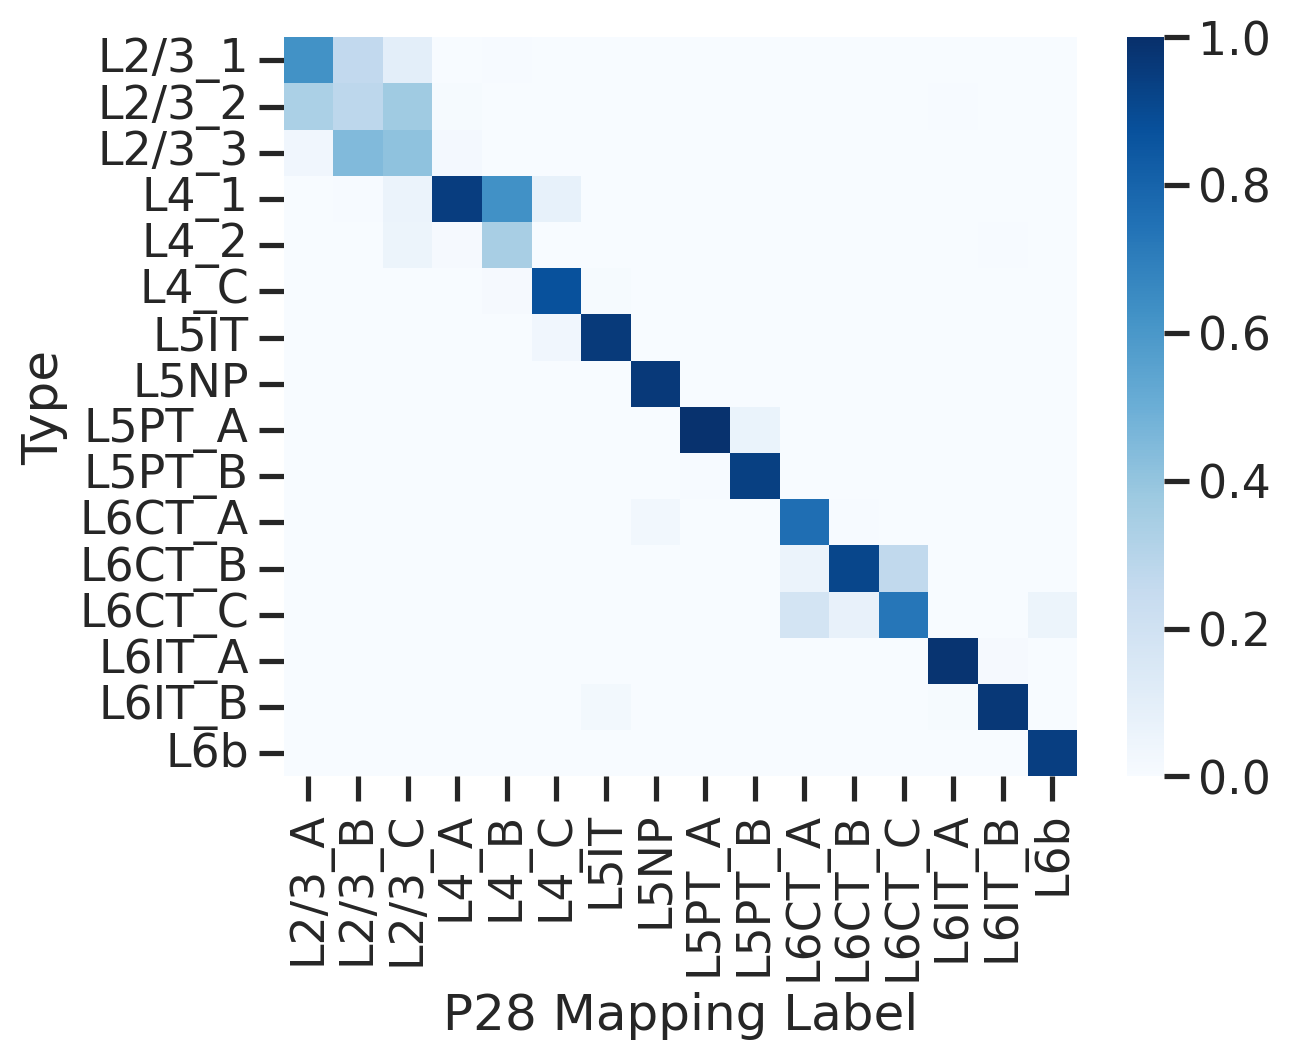

In [9]:
sns.heatmap(confnorm, cmap='Blues', vmin=0, vmax=1, yticklabels=True, xticklabels=True)
powerplots.savefig(fig)